In [1]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
paths[:5]

['C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/DELL/OneDrive/Desktop/Machine Learning/project/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:/Users/DELL/OneDrive/Desktop/Machine Learnin...,angry
1,C:/Users/DELL/OneDrive/Desktop/Machine Learnin...,angry
2,C:/Users/DELL/OneDrive/Desktop/Machine Learnin...,angry
3,C:/Users/DELL/OneDrive/Desktop/Machine Learnin...,angry
4,C:/Users/DELL/OneDrive/Desktop/Machine Learnin...,angry


In [6]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

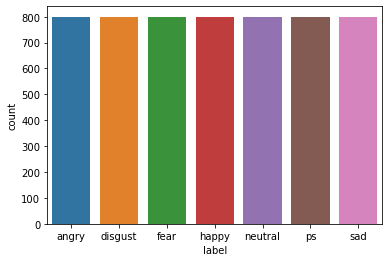

In [7]:
sns.countplot(df['label'])

In [8]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()